# Assignment 2 – Normalization Methods

1. Generate three variables (B, I, H) with 10,000 samples each:
   - **B:** Gaussian distribution (mean = 5, sd = 2)
   - **I:** Power law distribution (using `scipy.stats.powerlaw` with parameter a = 0.3)
   - **H:** Geometric distribution (with probability p = 0.005)
2. Compare the original variables using a box plot.
3. Apply various normalization methods:
   - Divide each variable by max
   - Divide variable by sum of its values
   - Convert each variable into z score using respecƟve mean and sd
   - For each variable, convert the values in percentiles
   - Make medians of all the variables same
      i. Calculate median of each variable 
      ii. Calculate mean of these medians say m1 
      iii. Generate a mulƟplier for each of the variables so that median value of each variable becomes m1
   - Quantile normalize the data using off the shelf library funcƟon
4. For each of the above method,  
      i. Compare original distribuƟon with its normalized version in single histogram 
      ii. Compare all the normalized variables in single box plot

In [1]:
# Install the libraries
%pip install numpy scipy matplotlib seaborn scikit-learn

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import powerlaw, geom
from sklearn.preprocessing import quantile_transform

# For reproducibility
np.random.seed(42)

# Ensure plots display in the notebook
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1. Generate Three Variables (10,000 Samples Each)

- **B:** Gaussian distribution (mean = 5, sd = 2)
- **I:** Power law distribution (a = 0.3)
- **H:** Geometric distribution (p = 0.005)

In [2]:
n_samples = 10000

# B: Gaussian distribution
B = np.random.normal(loc=5, scale=2, size=n_samples)

# I: Power law distribution
I = powerlaw.rvs(a=0.3, size=n_samples)

# H: Geometric distribution (geom.rvs returns integers starting at 1)
H = geom.rvs(p=0.005, size=n_samples)

## 2. Visualize the Original Variables

We'll create a box plot to compare the three original variables.

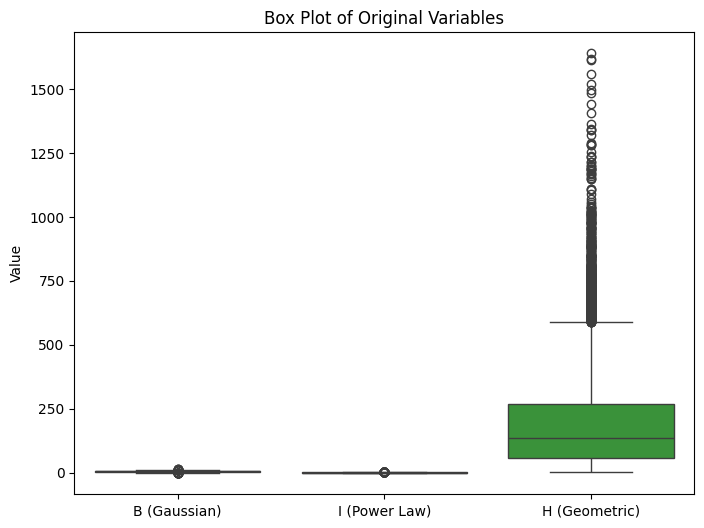

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[B, I, H], orient="v")
plt.xticks(ticks=[0, 1, 2], labels=['B (Gaussian)', 'I (Power Law)', 'H (Geometric)'])
plt.title("Box Plot of Original Variables")
plt.ylabel("Value")
plt.show()

## 3. Normalization Methods

We will define functions for each normalization method:

**(i) Divide by Max:** Scale each variable by its maximum value.

**(ii) Divide by Sum:** Scale each variable by the sum of its values.

**(iii) Z-score Normalization:** Convert each variable so that it has a mean of 0 and a standard deviation of 1.

**(iv) Convert to Percentages:** Express each value as a percentage of the maximum.

**(v) Make Medians the Same:**
  1. Calculate the median of each variable.
  2. Compute the mean of these medians (target median).
  3. Multiply each variable by a factor so that its median becomes the target median.

**(vi) Quantile Normalization:** Use an off-the-shelf function to force the distributions to be similar.

In [6]:
def normalize_by_max(x):
    return x / np.max(x)

def normalize_by_sum(x):
    return x / np.sum(x)

def normalize_zscore(x):
    return (x - np.mean(x)) / np.std(x)

def normalize_to_percentage(x):
    return 100 * (x / np.max(x))

def normalize_median(x, target_median):
    current_median = np.median(x)
    multiplier = target_median / current_median
    return x * multiplier

def quantile_normalize(x):
    # Reshape to 2D array since quantile_transform expects 2D input
    x_reshaped = x.reshape(-1, 1)
    x_qn = quantile_transform(x_reshaped, n_quantiles=1000, output_distribution='uniform', copy=True)
    return x_qn.flatten()

### 3a. Compute Normalized Variables Using Each Method

In [7]:
# Method (i): Divide by Max
B_norm_max = normalize_by_max(B)
I_norm_max = normalize_by_max(I)
H_norm_max = normalize_by_max(H)

# Method (ii): Divide by Sum
B_norm_sum = normalize_by_sum(B)
I_norm_sum = normalize_by_sum(I)
H_norm_sum = normalize_by_sum(H)

# Method (iii): Z-score normalization
B_zscore = normalize_zscore(B)
I_zscore = normalize_zscore(I)
H_zscore = normalize_zscore(H)

# Method (iv): Convert to Percentages
B_percent = normalize_to_percentage(B)
I_percent = normalize_to_percentage(I)
H_percent = normalize_to_percentage(H)

# Method (v): Make Medians the Same
# 1. Calculate the medians for each variable
med_B = np.median(B)
med_I = np.median(I)
med_H = np.median(H)
# 2. Calculate the mean of these medians (target median)
target_median = np.mean([med_B, med_I, med_H])
# 3. Normalize each variable so that its median becomes target_median
B_median_norm = normalize_median(B, target_median)
I_median_norm = normalize_median(I, target_median)
H_median_norm = normalize_median(H, target_median)

# Method (vi): Quantile normalization
B_qn = quantile_normalize(B)
I_qn = quantile_normalize(I)
H_qn = quantile_normalize(H)

# Organize normalized data in a dictionary for easier processing
normalized_data = {
    "Divide by Max": (B_norm_max, I_norm_max, H_norm_max),
    "Divide by Sum": (B_norm_sum, I_norm_sum, H_norm_sum),
    "Z-Score": (B_zscore, I_zscore, H_zscore),
    "Percentage": (B_percent, I_percent, H_percent),
    "Median Normalization": (B_median_norm, I_median_norm, H_median_norm),
    "Quantile Normalization": (B_qn, I_qn, H_qn)
}

## 4. Compare Original vs. Normalized Distributions and Box Plots

For each normalization method, we will:
1. Plot histograms comparing the original distribution with the normalized version for each variable (B, I, H).
2. Plot a combined box plot for the normalized variables.

Below is a helper function to create the histogram comparisons.

--- Normalization Method: Divide by Max ---


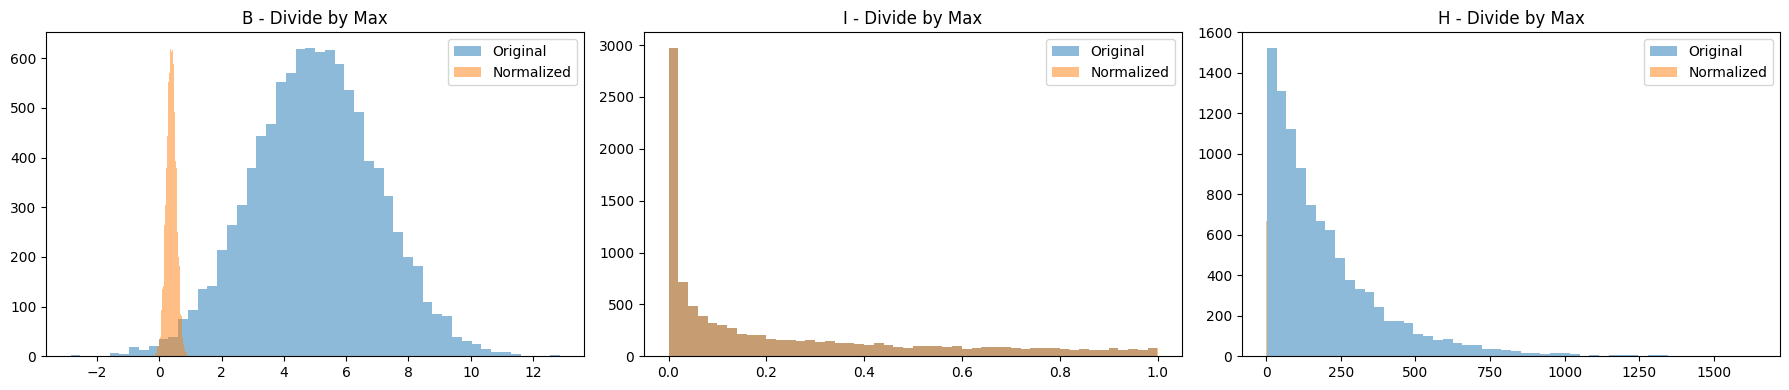

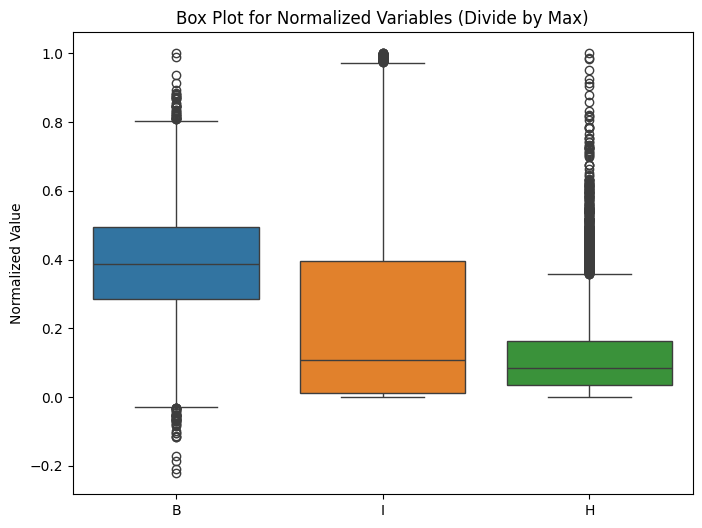

--- Normalization Method: Divide by Sum ---


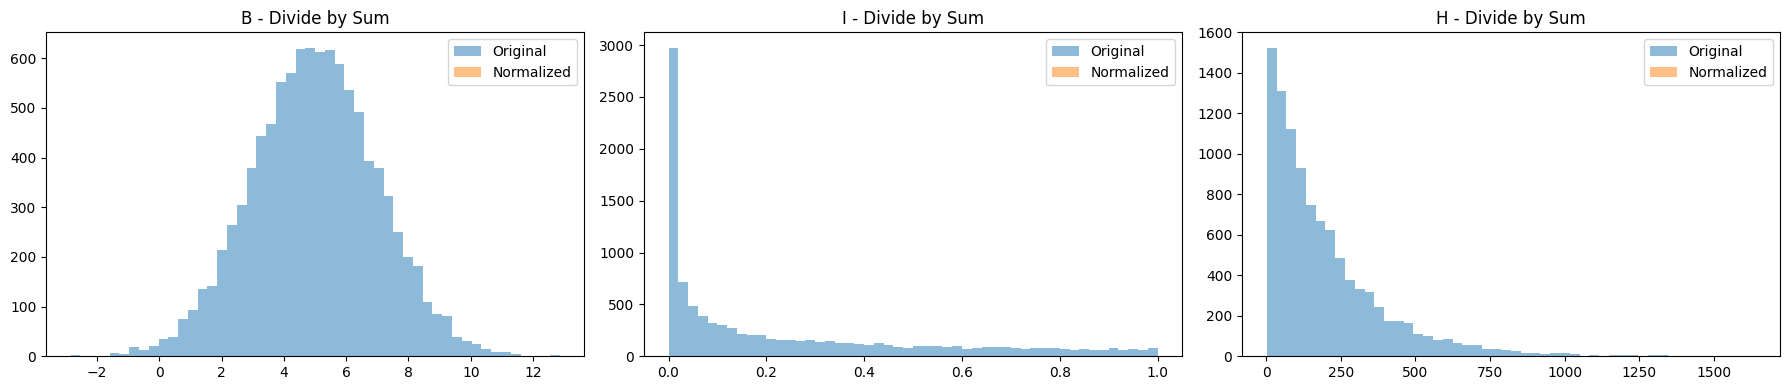

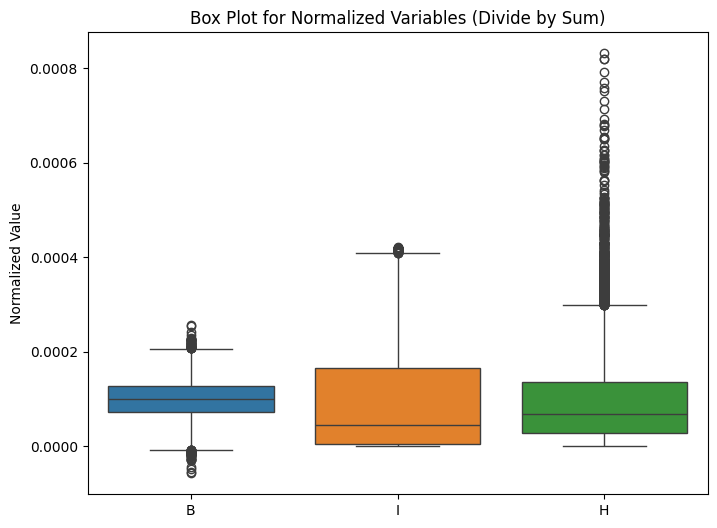

--- Normalization Method: Z-Score ---


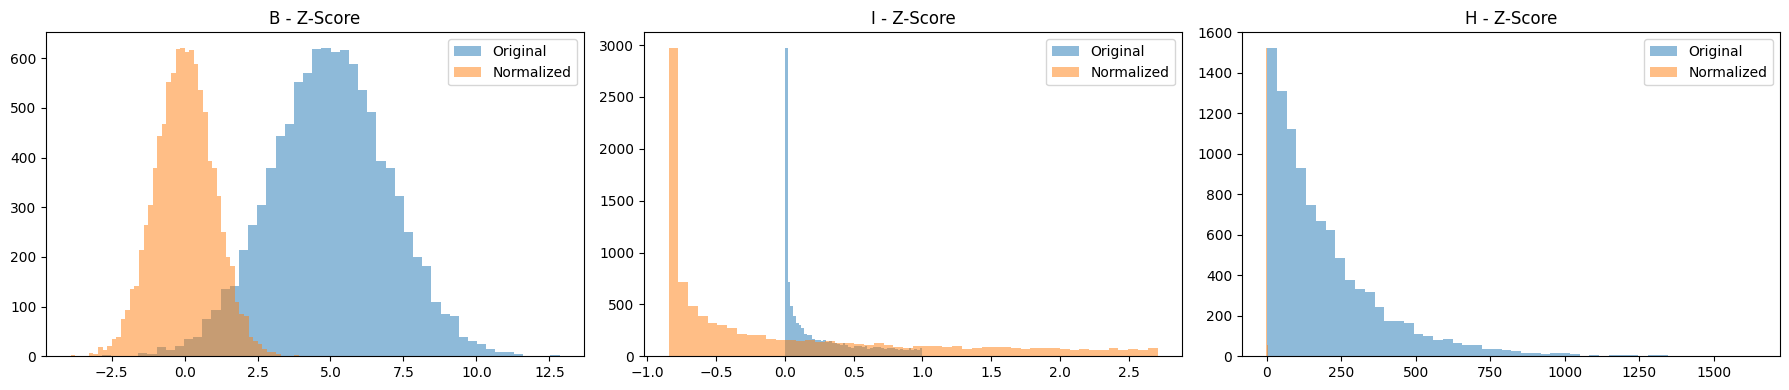

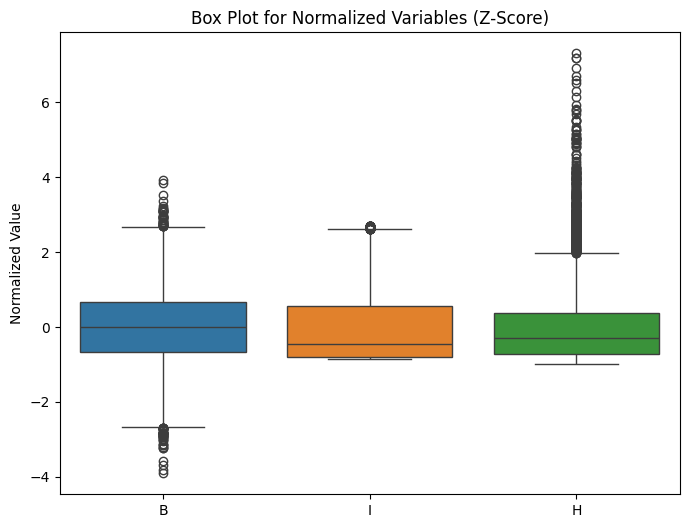

--- Normalization Method: Percentage ---


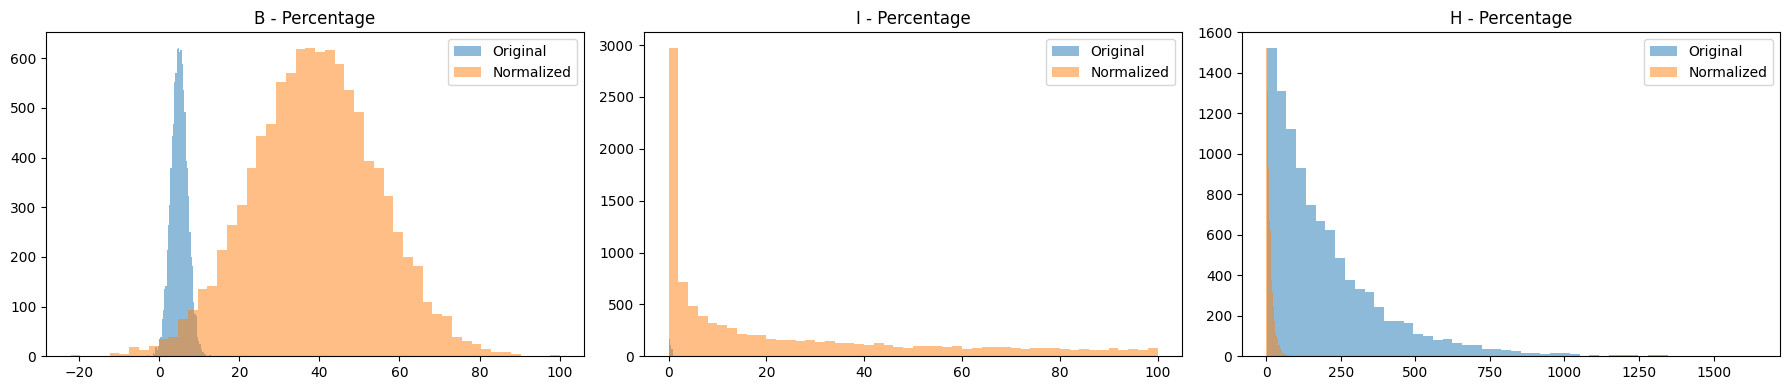

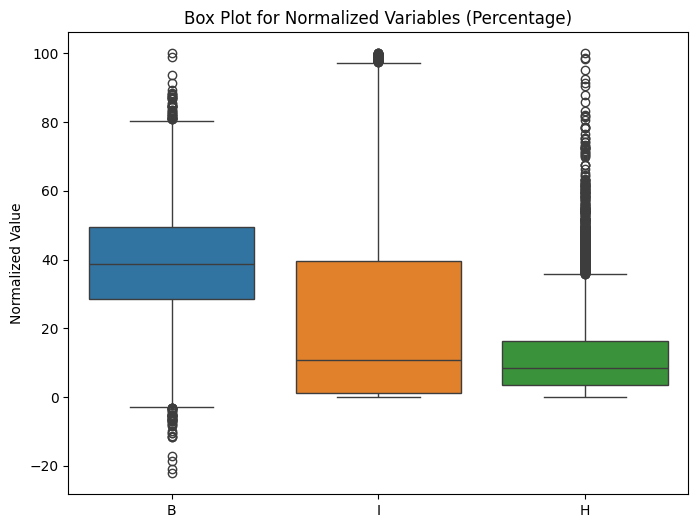

--- Normalization Method: Median Normalization ---


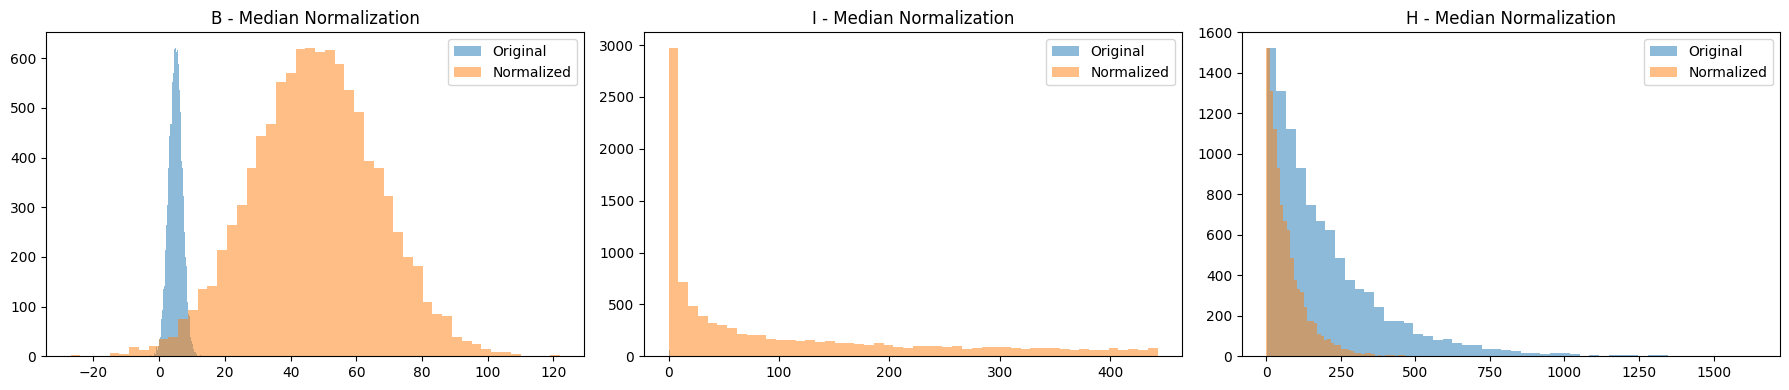

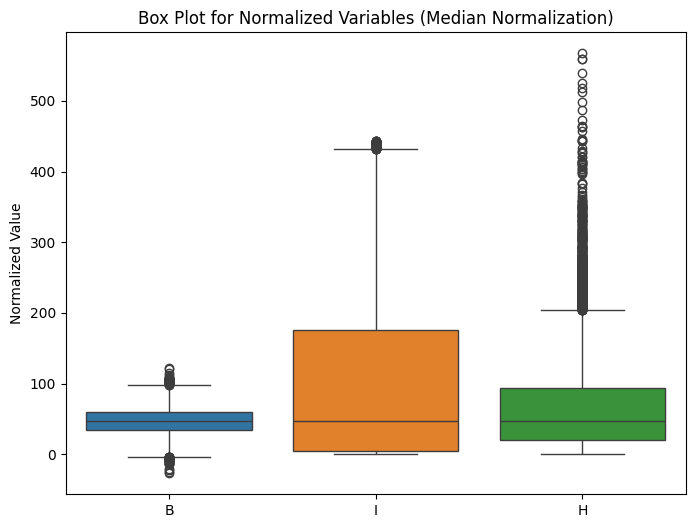

--- Normalization Method: Quantile Normalization ---


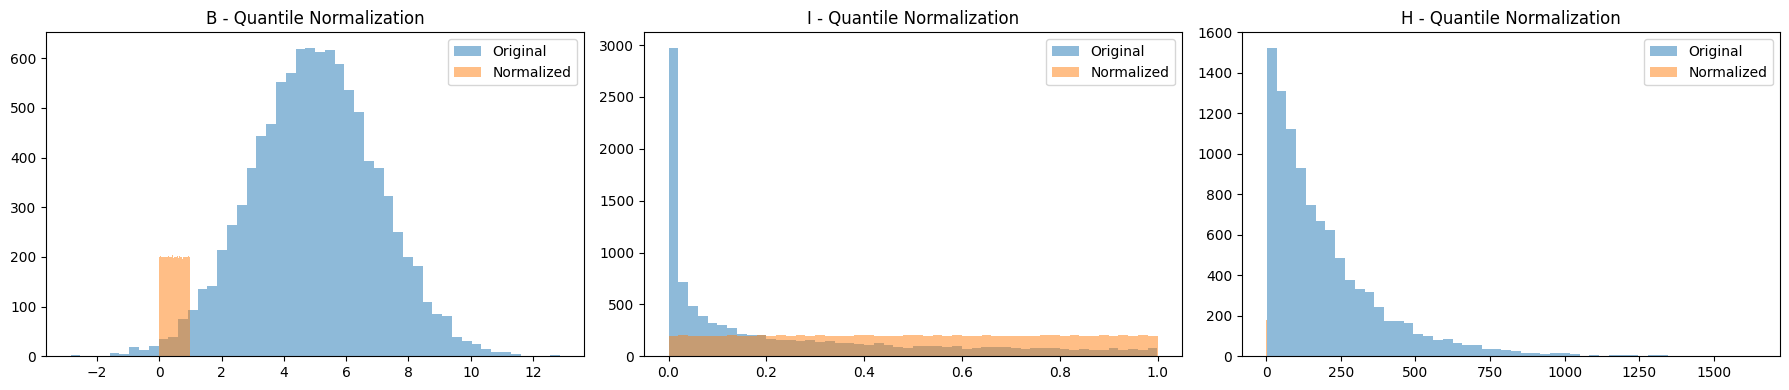

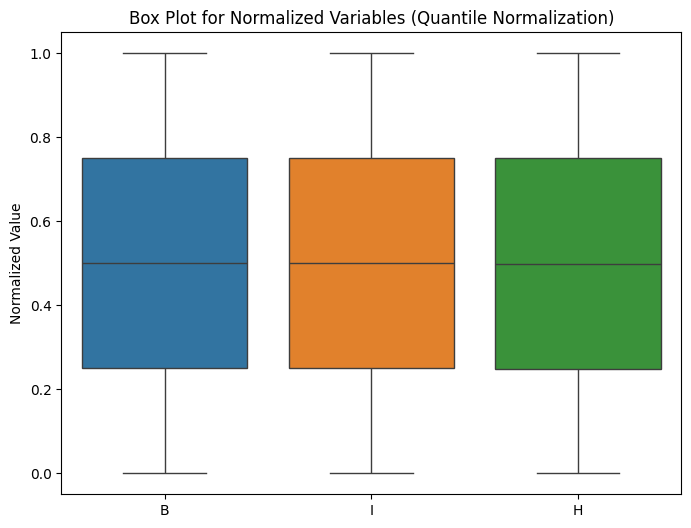

In [8]:
def plot_histogram_comparison(method_name, orig_vars, norm_vars):
    var_names = ['B', 'I', 'H']
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    for i, ax in enumerate(axes):
        ax.hist(orig_vars[i], bins=50, alpha=0.5, label='Original')
        ax.hist(norm_vars[i], bins=50, alpha=0.5, label='Normalized')
        ax.set_title(f"{var_names[i]} - {method_name}")
        ax.legend()
    plt.tight_layout()
    plt.show()

# Group original variables in a list for easier handling
orig_vars = [B, I, H]

# Iterate through each normalization method
for method_name, (B_norm, I_norm, H_norm) in normalized_data.items():
    print(f"--- Normalization Method: {method_name} ---")
    
    # 1. Histogram comparison for each variable
    plot_histogram_comparison(method_name, orig_vars, [B_norm, I_norm, H_norm])
    
    # 2. Box plot comparing all three normalized variables
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=[B_norm, I_norm, H_norm])
    plt.xticks(ticks=[0, 1, 2], labels=['B', 'I', 'H'])
    plt.title(f"Box Plot for Normalized Variables ({method_name})")
    plt.ylabel("Normalized Value")
    plt.show()

## 5. Observations

**Divide by Max:**
- All values are scaled between 0 and 1, maintaining the shape but compressing the absolute differences.

**Divide by Sum:**
- Each value becomes a fraction of the total sum. Useful for proportions but may alter the distribution shape.

**Z-Score Normalization:**
- Data is centered around zero with unit variance. Outliers become more apparent, and the distribution is standardized.

**Percentage Conversion:**
- Similar to divide-by-max but scaled to 0-100. Provides an intuitive percentage view.

**Median Normalization:**
- Adjusts each variable so that the medians are equal (to the average of the original medians). Useful when the median is a key metric.

**Quantile Normalization:**
- Forces the distributions to have a similar shape by aligning quantiles. Often used in bioinformatics for comparable distribution shapes.

Visual comparisons using histograms and box plots help in understanding how each normalization method affects the data.